In [24]:
import pandas as pd
import os
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
corpus = [os.path.join('../dataset/raw', name) for name in os.listdir('../dataset/raw')] + \
         [os.path.join('../dataset/raw_other', name) for name in os.listdir('../dataset/raw_other')]

In [3]:
stats = []

for file in corpus:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        text = re.sub("[«»]", " ", text)
        text = text.replace('\u2003', ' ')
        sentence_cnt = 0
        sents = sent_tokenize(text, language='russian')
        sentence_cnt += len(sents)
        words  = [len(sent.split()) for sent in sents]
        sent_words_cnt = sum(words) // len(words)
        all_tokens_cnt = len(word_tokenize(text, language='russian'))
        intro_tokens_cnt = len(word_tokenize(sents[0], language='russian'))  # кол-во токенов во вступлении произведения
        conclusion_tokens_cnt = len(word_tokenize(sents[-1], language='russian')) # кол-во токенов в концовке произведения
        body_tokens_cnt = (all_tokens_cnt - intro_tokens_cnt - conclusion_tokens_cnt) if len(sents) > 2 else 0 # кол-во токенов в теле произведения
        stats.append((file, sentence_cnt, sent_words_cnt, all_tokens_cnt, intro_tokens_cnt, body_tokens_cnt, conclusion_tokens_cnt, text))


In [4]:
df = pd.DataFrame.from_records(stats, columns=['file', 'sentences', 'sent_words_cnt', 'all_toks', 'intro_toks', 'body_toks', 'concl_toks', 'orig_text'])

In [5]:
df.head()

,file,sentences,sent_words_cnt,all_toks,intro_toks,body_toks,concl_toks,orig_text
0,../dataset/raw\001 Арысь - поле.txt,19,13,302,27,261,14,"У старика была дочь-красавица, жил он с нею ти..."
1,../dataset/raw\002 Байка про тетерева.txt,12,9,144,5,117,22,Захотел тетерев дом строить.\nПодумал-подумал:...
2,../dataset/raw\003 Бобовое зернышко.txt,26,11,417,5,406,6,Жили-были петушок да курочка. Рылся петушок и ...
3,../dataset/raw\004 Волк и коза.txt,40,10,548,12,524,12,"Жила-была коза, сделала себе в лесу избушку и ..."
4,../dataset/raw\005 Ворона и рак.txt,11,9,128,13,99,16,"Летела ворона по-над морем, смотрит: рак ползе..."


## Sentences

count    582.000000
mean      64.713058
std       51.468505
min        1.000000
25%       26.250000
50%       53.000000
75%       88.750000
max      392.000000
Name: sentences, dtype: float64


<AxesSubplot:ylabel='Frequency'>

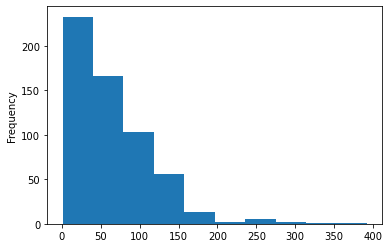

In [6]:
print(df.sentences.describe())
df.sentences.plot.hist()

In [7]:
df.iloc[df[['sentences']].idxmin()]

,file,sentences,sent_words_cnt,all_toks,intro_toks,body_toks,concl_toks,orig_text
209,../dataset/raw\210 Коли утонешь.txt,1,21,26,26,0,26,"Старуха мать ругала мальчишку, чтоб он не ходи..."


In [8]:
df.iloc[df[['sentences']].idxmin()].orig_text.item()

'Старуха мать ругала мальчишку, чтоб он не ходил на реку купаться:\n— Ну смотри, коль утонешь, так и домой не ходи!'

count    582.000000
mean      11.197595
std        4.053488
min        3.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       43.000000
Name: sent_words_cnt, dtype: float64


<AxesSubplot:ylabel='Frequency'>

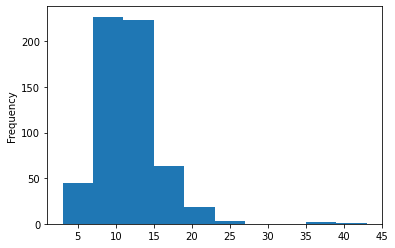

In [9]:
print(df.sent_words_cnt.describe())
df.sent_words_cnt.plot.hist()

In [10]:
df.iloc[df[['sent_words_cnt']].idxmin()].orig_text.item()

'— Коза, коза, лубяные глаза, где ты была?\n— Коней пасла.\n— А кони-то где?\n— Николка увел.\n— А Николка-то где?\n— В клеть ушел.\n— А клеть-то где?\n— Водой унесло.\n— А вода-то где?\n— Быки выпили.\n— А быки-то где?\n— В гору ушли.\n— А гора-то где?\n— Черви сточили.\n— А черви-то где?\n— Гуси выклевали.\n— А гуси-то где?\n— В вересняк ушли.\n— А вересняк-то где?\n— Девки выломали.\n— А девки-то где?\n— Замуж выскакали.\n— А мужья-то где?\n— Все примерли.'

## Words

count     582.000000
mean      951.723368
std       793.299040
min        26.000000
25%       338.750000
50%       738.500000
75%      1401.250000
max      5695.000000
Name: all_toks, dtype: float64


<AxesSubplot:ylabel='Frequency'>

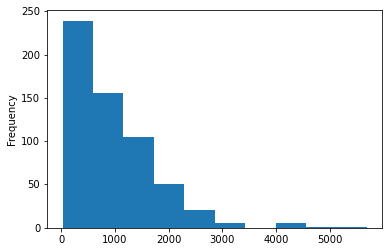

In [11]:
print(df.all_toks.describe())
df.all_toks.plot.hist()

count    582.000000
mean      15.231959
std       10.969657
min        2.000000
25%        8.000000
50%       12.000000
75%       19.000000
max       77.000000
Name: intro_toks, dtype: float64


<AxesSubplot:ylabel='Frequency'>

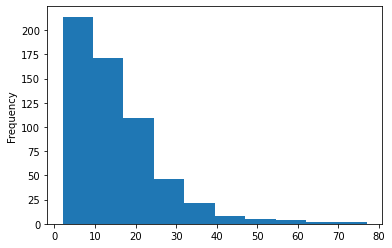

In [12]:
print(df.intro_toks.describe())
df.intro_toks.plot.hist()

In [13]:
df.iloc[df[['intro_toks']].idxmin()]

,file,sentences,sent_words_cnt,all_toks,intro_toks,body_toks,concl_toks,orig_text
555,../dataset/raw_other\Чарская Лидия Алексеевна ...,133,8,1436,2,1406,28,"Ха! Ха! Ха!\nХи! Хи! Хи!\nЗа десятки, за сотни..."


count    582.000000
mean      18.178694
std       15.503895
min        1.000000
25%        9.000000
50%       15.000000
75%       23.000000
max      171.000000
Name: concl_toks, dtype: float64


<AxesSubplot:ylabel='Frequency'>

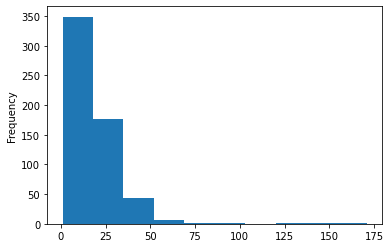

In [14]:
print(df.concl_toks.describe())
df.concl_toks.plot.hist()

In [15]:
df.iloc[df[['concl_toks']].idxmin()]

,file,sentences,sent_words_cnt,all_toks,intro_toks,body_toks,concl_toks,orig_text
103,../dataset/raw\104 Барин - кузнец.txt,26,9,300,24,275,1,Позавидовал один барин кузнецу: Живешь-живешь...


count     582.000000
mean      918.432990
std       789.246237
min         0.000000
25%       316.500000
50%       707.500000
75%      1342.750000
max      5667.000000
Name: body_toks, dtype: float64


<AxesSubplot:ylabel='Frequency'>

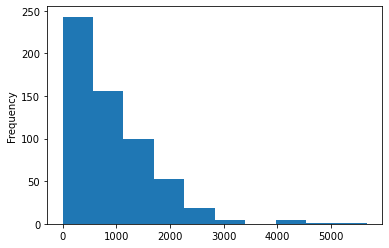

In [16]:
print(df.body_toks.describe())
df.body_toks.plot.hist()

## Word Cloud

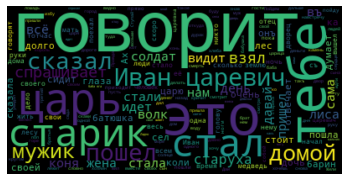

In [26]:
stopwords = stopwords.words('russian')

full_text = " ".join(df['orig_text'])
wordcloud = WordCloud(stopwords=stopwords).generate(full_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Результаты

In [17]:
print("Общее число документов:", len(df))
print("\nСтатистика по словам в корпусе:")
print("Всего неуникальных слов:", sum(df['all_toks']))
print("Среднее число слов в документе:", int(df.all_toks.describe()['mean']))
print("Минимальное число слов в документе:", int(df.all_toks.describe()['min']))
print("Максимальное число слов в документе:", int(df.all_toks.describe()['max']))
print("\nСтатистика по предложениям в корпусе:")
print("Среднее число предложений в документе:", int(df.sentences.describe()['mean']))
print("Минимальное число предложений в документе:", int(df.sentences.describe()['min']))
print("Максимальное число предложений в документе:", int(df.sentences.describe()['max']))
print("Среднее число слов в предложении:", int(df.sent_words_cnt.describe()['mean']))

Общее число документов: 582

Статистика по словам в корпусе:
Всего неуникальных слов: 553903
Среднее число слов в документе: 951
Минимальное число слов в документе: 26
Максимальное число слов в документе: 5695

Статистика по предложениям в корпусе:
Среднее число предложений в документе: 64
Минимальное число предложений в документе: 1
Максимальное число предложений в документе: 392
Среднее число слов в предложении: 11
